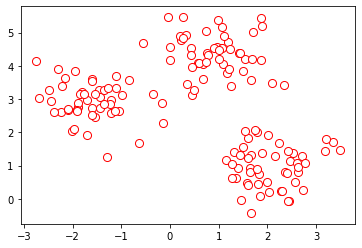

In [24]:
import numpy as np;import pandas as pd;
from sklearn.datasets import make_blobs;import matplotlib.pyplot as plt;import seaborn as sns
X,y=make_blobs(n_samples=150,n_features=2,centers=3,cluster_std=0.6,shuffle=True,random_state=0)
plt.scatter(X[:,0],X[:,1],edgecolors='red',s=65,color='white')

##### Gráfica con tres cluster aprecidados a simple vista

In [25]:
from sklearn.cluster import KMeans
modelo=KMeans(n_clusters=3,init='random',random_state=0)
y_pred=modelo.fit_predict(X)


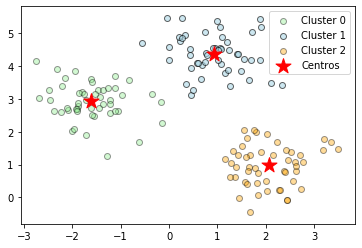

In [31]:
plt.scatter(X[y_pred==0,0],X[y_pred==0,1],color='lightgreen',alpha=0.4,edgecolors='black',label='Cluster 0')
plt.scatter(X[y_pred==1,0],X[y_pred==1,1],color='lightblue',alpha=0.6,edgecolors='black',label='Cluster 1')
plt.scatter(X[y_pred==2,0],X[y_pred==2,1],color='orange',alpha=0.4,edgecolors='black',label='Cluster 2')
plt.scatter(modelo.cluster_centers_[:,0],modelo.cluster_centers_[:,1],marker='*',s=250,color='red',label='Centros')
plt.legend()

##### La principal desventaja del modelo K-Means es que de antemano se debe fijar el número de cluster, información que apriori se no es imposible de obtener

# Una forma más lista de inicializar el centroide de los clusters con K-Means++


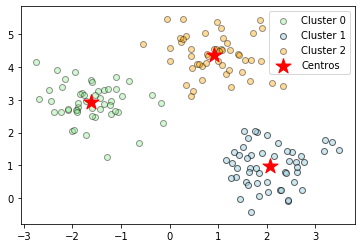

In [32]:
modelo=KMeans(n_clusters=3,init='k-means++',random_state=0)
y_pred=modelo.fit_predict(X)
plt.scatter(X[y_pred==0,0],X[y_pred==0,1],color='lightgreen',alpha=0.4,edgecolors='black',label='Cluster 0')
plt.scatter(X[y_pred==1,0],X[y_pred==1,1],color='lightblue',alpha=0.6,edgecolors='black',label='Cluster 1')
plt.scatter(X[y_pred==2,0],X[y_pred==2,1],color='orange',alpha=0.4,edgecolors='black',label='Cluster 2')
plt.scatter(modelo.cluster_centers_[:,0],modelo.cluster_centers_[:,1],marker='*',s=250,color='red',label='Centros')
plt.legend()